<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [31]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

df = pd.read_csv('car_insurance.csv')
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

       id  age  gender  ... duis past_accidents outcome
0  569520    3       0  ...    0              0     0.0
1  750365    0       1  ...    0              0     1.0
2  199901    0       0  ...    0              0     0.0
3  478866    0       1  ...    0              0     0.0
4  731664    1       1  ...    0              1     1.0

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 n

In [32]:
#Fill missing values with the mean for normally distributed columns
df = df.fillna(df.mean(numeric_only=True))

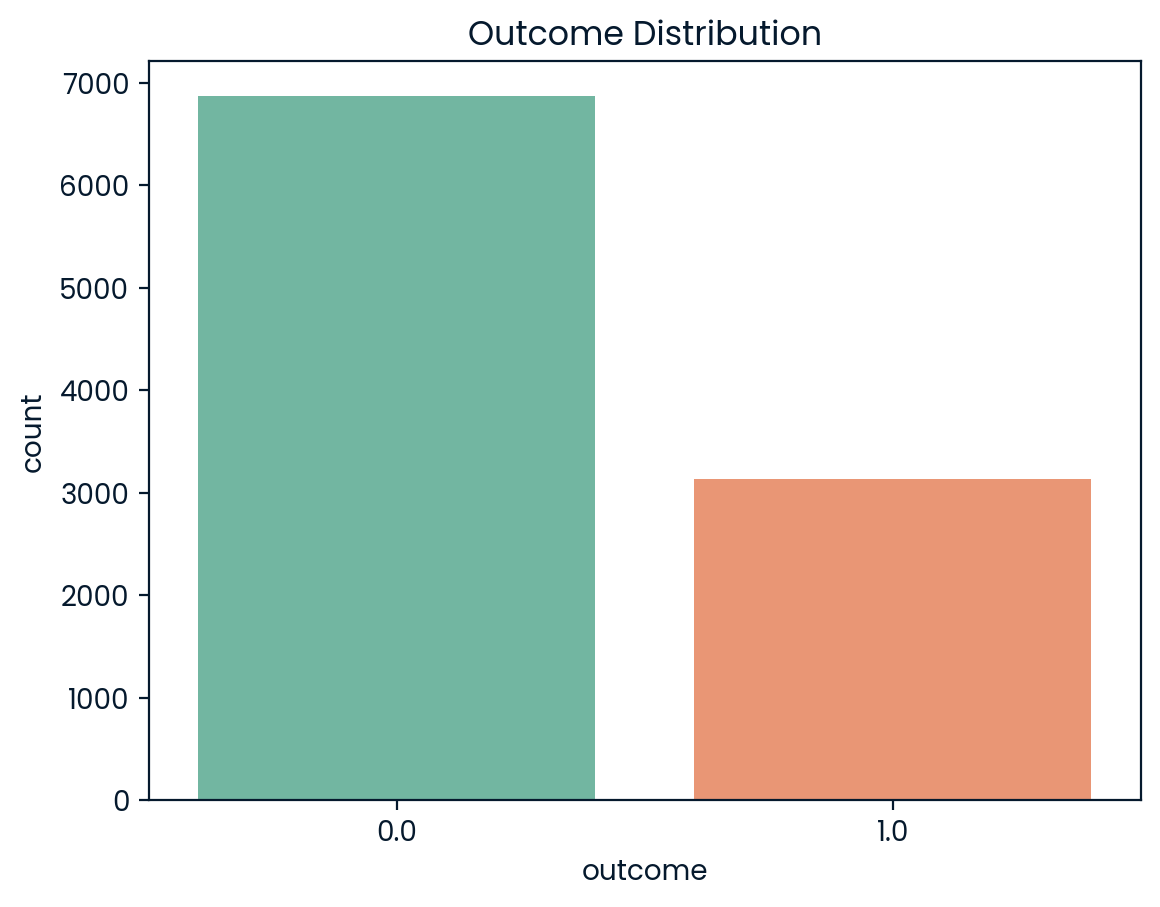

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="outcome", data=df, palette="Set2")
plt.title("Outcome Distribution")
plt.show()

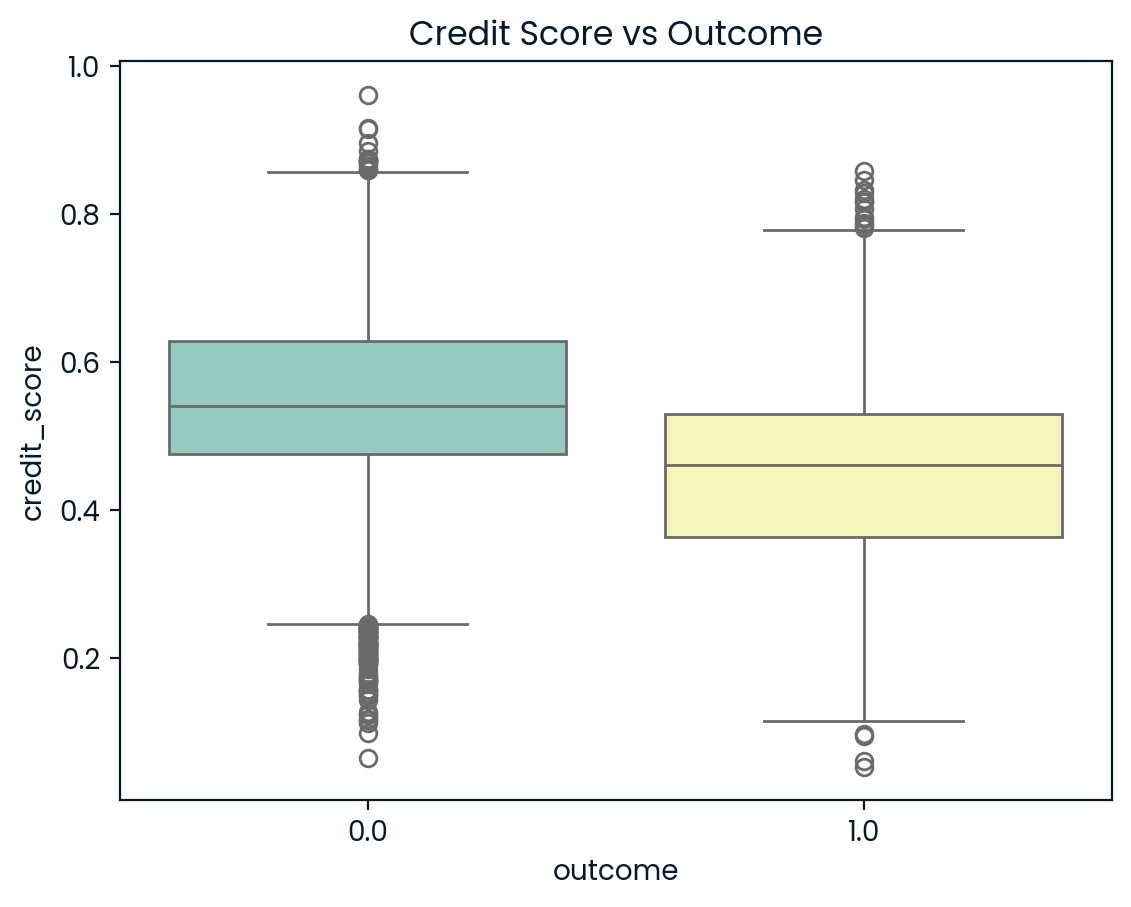

In [34]:
sns.boxplot(x="outcome", y="credit_score", data=df, palette="Set3")
plt.title("Credit Score vs Outcome")
plt.show()


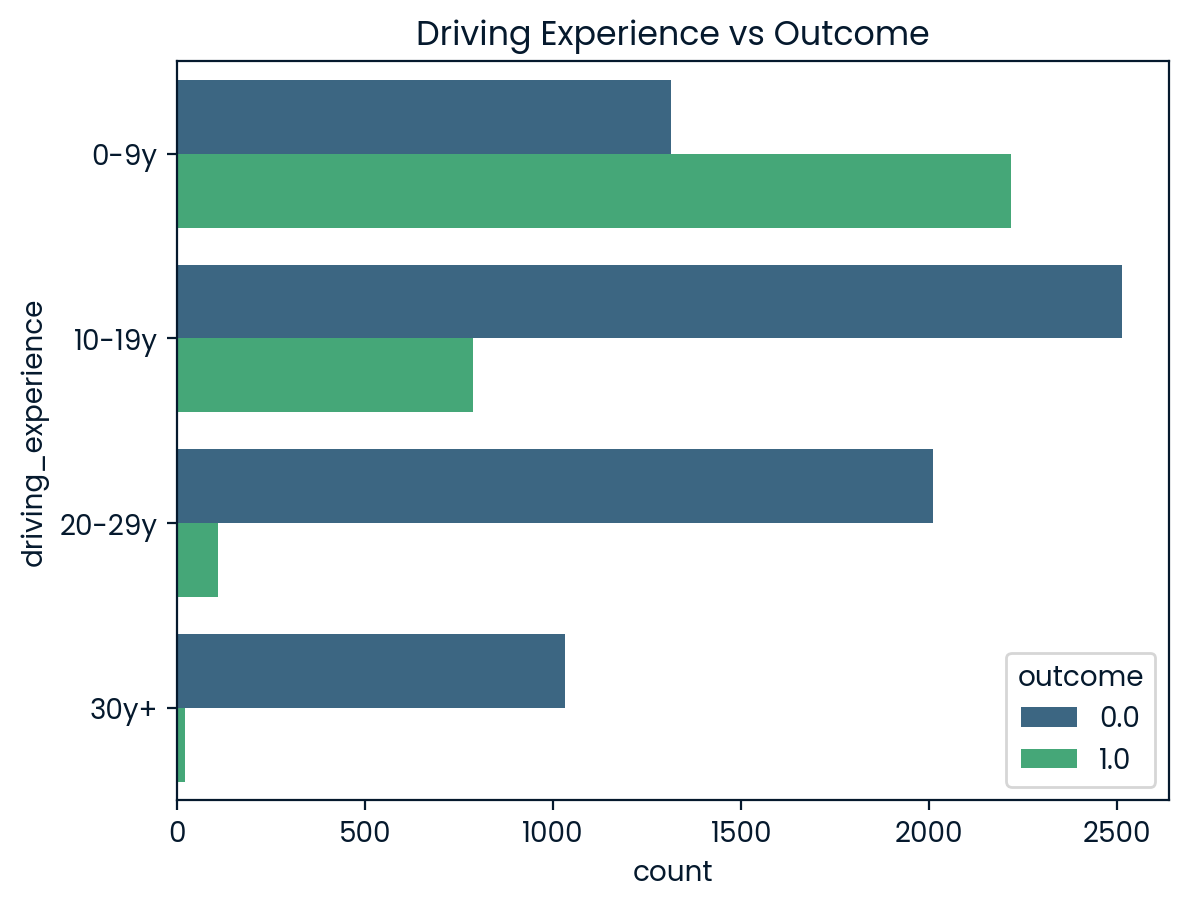

In [35]:
sns.countplot(y="driving_experience", hue="outcome", data=df, palette="viridis")
plt.title("Driving Experience vs Outcome")
plt.show()


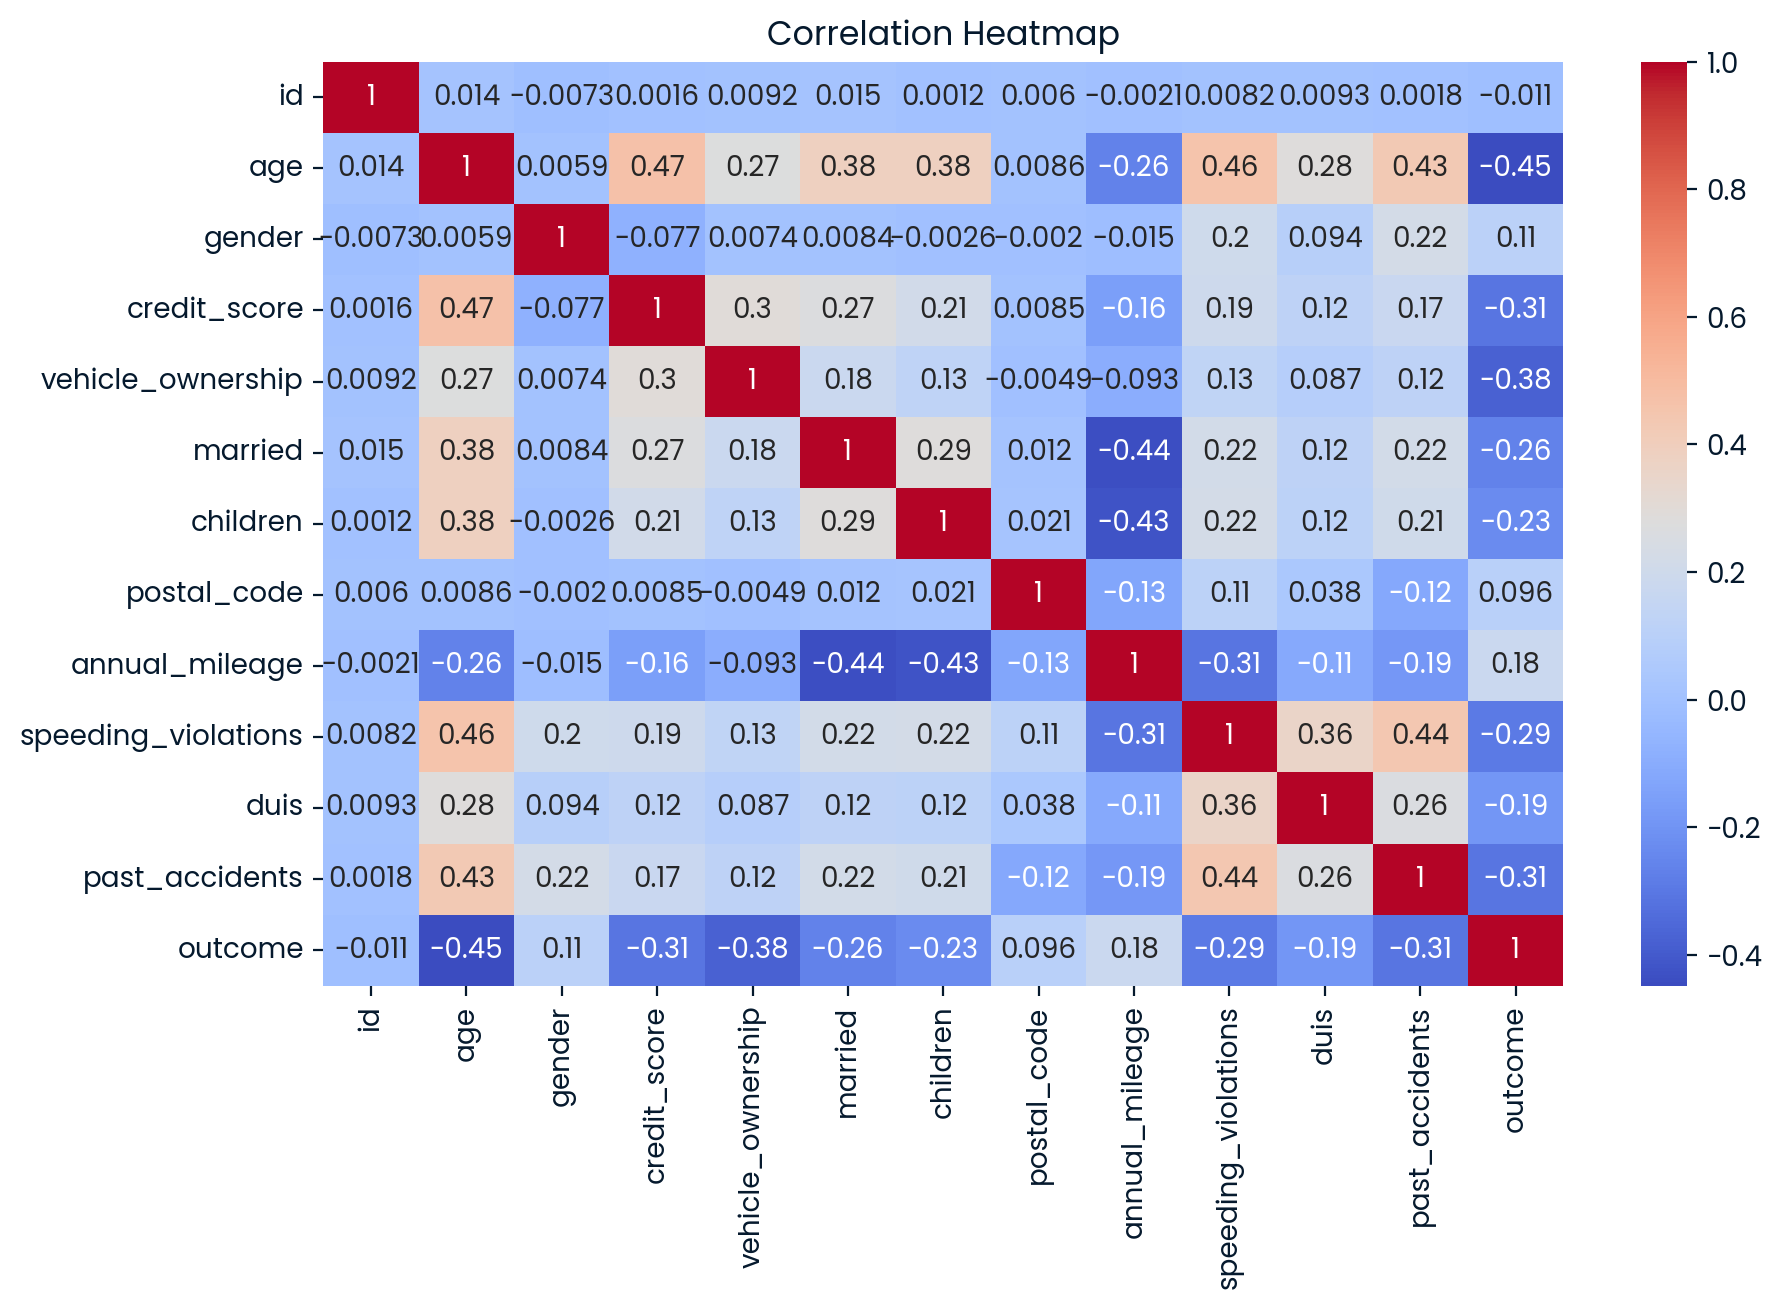

In [36]:
import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [37]:
df.isnull().sum()


id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [38]:
df['outcome'].value_counts(normalize=True)


0.0    0.6867
1.0    0.3133
Name: outcome, dtype: float64

In [39]:

import statsmodels.formula.api as smf

# Drop id (not useful for prediction)
features = df.drop(columns=["id", "outcome"]).columns

models = []       # to store models
accuracies = []   # to store accuracies

# Loop through each feature
for col in features:
    # Logistic regression model: outcome ~ feature
    model = smf.logit(formula=f"outcome ~ {col}", data=df).fit(disp=False)
    models.append(model)
    
    # Confusion matrix
    conf_matrix = model.pred_table()
    
    # Extract TN, TP, FN, FP
    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracies.append(accuracy)

# Find the index of the best accuracy
best_idx = accuracies.index(max(accuracies))

# Store results in DataFrame
best_feature_df = pd.DataFrame({
    "best_feature": [features[best_idx]],
    "best_accuracy": [accuracies[best_idx]]
})

print(best_feature_df)


         best_feature  best_accuracy
0  driving_experience         0.7771
